In [ ]:
pip install pyspark

In [ ]:
# importing module
import pyspark

# importing sparksession from 
# pyspark.sql module
#pyspark.sql.SparkSession Main entry point for DataFrame and SQL functionality
#pyspark.sql.DataFrame A distributed collection of data grouped into named columns
#pyspark.sql.SparkSession(sparkContext, jsparkSession=None)[source]
#The entry point to programming Spark with the Dataset and DataFrame API.
#A SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files.
from pyspark.sql import SparkSession
  
# creating sparksession and giving 
# an app name

#builder: A class attribute having a Builder to construct SparkSession instances
#appName(name)[source] Sets a name for the application, which will be shown in the Spark web UI.
#If no application name is set, a randomly generated name will be used.

#getOrCreate()[source]
#Gets an existing SparkSession or, if there is no existing one, creates a new one based on the options set in this builder.
#This method first checks whether there is a valid global default SparkSession, and if yes, return that one. If no valid global default SparkSession exists, the method creates a new SparkSession and assigns the newly created SparkSession as the global default.

spark = SparkSession.builder.appName('sparkdf').getOrCreate()

### **Data Loading and Data Framing**

In [ ]:
from pandas.compat.numpy import np_datetime64_compat
from sklearn.datasets import load_iris
from pyspark.ml.linalg import Vectors
import numpy as np
import pandas as pd

#load iris dataset
iris_data = load_iris()
#Classes 3
#Samples per class 50
#Samples total 150
#Dimensionality 4
#Features real, positive
#print(iris_data.data)
groundtruth=iris_data.target
features=iris_data.data
#print(type(groundtruth))
#print(groundtruth.shape,features.shape)
print(groundtruth)
print(features)


b=groundtruth.reshape((len(groundtruth),1))
#print(b.shape)
data=np.concatenate((b,iris_data.data), axis = 1)
print(data)

#print(data)

#iris label with data
dff = map(lambda x: (int(x[0]), Vectors.dense(x[1:])), data)

#dff = map(lambda x: (int(x[0]),Vectors.dense(x)), iris_data.data)
columns = ["label", "features"]
#df = pd.DataFrame(iris_data.data, columns=list('abcd'))
mydf = spark.createDataFrame(dff,columns)
# show data frame
mydf.show(150)



# Prepare test data
my_test = spark.createDataFrame([
    (0.0, Vectors.dense([4.6, 3.1, 1.5, 0.2])),
    (0.0, Vectors.dense([5.4, 3.7, 1.5, 0.2])),
    (1.0, Vectors.dense([5.9,3.2,4.8,1.8])),
    (1.0, Vectors.dense([6.3,2.5,4.9,1.5])),
    (2.0, Vectors.dense([6.7,3.3,5.7,2.5]))], ["label", "features"])



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

### **Linear Regression**

In [ ]:
from pyspark.ml.regression import LinearRegression

#create instance of linear regression
#The learning objective is to minimize the specified loss function, with regularization. This supports two kinds of loss:
#squaredError (a.k.a squared loss)
#least squares regularization

lr = LinearRegression(featuresCol = 'features', maxIter=10, regParam=0.3, loss='squaredError')

# Fit the model
lr_model = lr.fit(mydf)

# Print the coefficients and intercept for linear regression
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

#predict the data with this linear regression model
test_data_1=my_test.collect()[0]
print("For test data 1 prediction: %f  Original: %d" %(lr_model.predict(test_data_1.features),test_data_1.label))

test_data_2=my_test.collect()[2]
print("For test data 2 prediction: %f  Original: %d" %(lr_model.predict(test_data_2.features),test_data_2.label))



Coefficients: [0.1454035169766318,-0.19609029124319305,0.14419140589678436,0.3921800360534983]
Intercept: -0.2623537270395407
RMSE: 0.258500
For test data 1 prediction: 0.093346  Original: 0
For test data 2 prediction: 1.366081  Original: 1


# **K-means Clustering**

In [ ]:
#numpy to spark dataframe
import numpy as np
from pyspark.ml.linalg import Vectors

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
# Trains a k-means model.
kmeans = KMeans().setSeed(1).setK(3).setDistanceMeasure('euclidean')


km_model = kmeans.fit(mydf)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(metricName='silhouette', distanceMeasure='squaredEuclidean')
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = km_model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

#prediction:

test_data_1=my_test.collect()[0]
print("For test data 1 predicted cluster: %f  Original cluster: %d" %(km_model.predict(test_data_1.features),test_data_1.label))

test_data_2=my_test.collect()[2]
print("For test data 2 predicted cluster: %f  Original cluster: %d" %(km_model.predict(test_data_2.features),test_data_2.label))

test_data_3=my_test.collect()[4]
print("For test data 3 predicted cluster: %f  Original cluster: %d" %(km_model.predict(test_data_3.features),test_data_2.label))

Silhouette with squared euclidean distance = 0.7344130579787836
Cluster Centers: 
[5.88360656 2.74098361 4.38852459 1.43442623]
[5.006 3.428 1.462 0.246]
[6.85384615 3.07692308 5.71538462 2.05384615]
For test data 1 predicted cluster: 1.000000  Original cluster: 0
For test data 2 predicted cluster: 0.000000  Original cluster: 1
For test data 3 predicted cluster: 2.000000  Original cluster: 1


## **Logistic Regression Classifier**

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a LogisticRegression instance. This instance is an Estimator.
lr = LogisticRegression(maxIter=30, regParam=0.01)

# Learn a LogisticRegression model. This uses the parameters stored in lr.
lrc = lr.fit(mydf)

# Since model1 is a Model (i.e., a transformer produced by an Estimator),
# extractParamMap() prints the parameters this LogisticRegression instance used during fit().
print("Model was fit using parameters: ")
print(lrc.extractParamMap())
print("\n\n")

# Make predictions on test data using the Transformer.transform() method.
# LogisticRegression.transform will only use the 'features' column.
# Note that model2.transform() outputs a "myProbability" column instead of the usual
# 'probability' column since we renamed the lr.probabilityCol parameter previously.
# compute accuracy on the test set
result = lrc.transform(my_test)
predictionAndLabels = result.select('features', 'label', 'prediction', 'probability')
predictionAndLabels.show()

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

Model was fit using parameters: 
{Param(parent='LogisticRegression_7a23b29da942', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_7a23b29da942', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_7a23b29da942', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_7a23b29da942', name='featuresCol', doc='features column name.'): 'features', Param(parent='LogisticRegression_7a23b29da942', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_7a23b29da942', name='labelCol', doc='label column name.'): 'label', Param(parent='LogisticRegression_7a23b29da942', name='maxBlockSizeInMB', doc=

## **Naive Bayes Classifier**

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#data modeling
nb = NaiveBayes(smoothing=0.5, modelType="multinomial")
nb = nb.fit(mydf)

#prediction
result = nb.transform(my_test)
predictionAndLabels = result.select('features', 'label', 'prediction', 'probability')
predictionAndLabels.show()

# evaluation: compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))


+-----------------+-----+----------+--------------------+
|         features|label|prediction|         probability|
+-----------------+-----+----------+--------------------+
|[4.6,3.1,1.5,0.2]|  0.0|       0.0|[0.66753665375089...|
|[5.4,3.7,1.5,0.2]|  0.0|       0.0|[0.77079040565310...|
|[5.9,3.2,4.8,1.8]|  1.0|       2.0|[0.02305501121933...|
|[6.3,2.5,4.9,1.5]|  1.0|       2.0|[0.02328585154573...|
|[6.7,3.3,5.7,2.5]|  2.0|       2.0|[0.00542491580818...|
+-----------------+-----+----------+--------------------+

Test set accuracy = 0.6


### **Decision Tree Classifier**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#create instance
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
#fit the data
dtModel = dt.fit(mydf)


# prediction
result = dtModel.transform(my_test)
predictionAndLabels = result.select('features', 'label', 'prediction')
predictionAndLabels.show()

#evaluation
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.6,3.1,1.5,0.2]|  0.0|       0.0|
|[5.4,3.7,1.5,0.2]|  0.0|       0.0|
|[5.9,3.2,4.8,1.8]|  1.0|       2.0|
|[6.3,2.5,4.9,1.5]|  1.0|       1.0|
|[6.7,3.3,5.7,2.5]|  2.0|       2.0|
+-----------------+-----+----------+

Test set accuracy = 0.8


## **Support Vector Machine**

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

sqlContext = SQLContext(spark)

mydf2 = sqlContext.createDataFrame(mydf.head(100), mydf.schema)

#data split
(train, test) = mydf2.randomSplit([0.8, 0.2])

#create instance
lsvc = LinearSVC(labelCol="label", maxIter=50)

#fit the data
lsvc = lsvc.fit(train)

# preeiction
result = lsvc.transform(my_test)
predictionAndLabels = result.select('features', 'label', 'prediction', 'rawPrediction')
predictionAndLabels.show()

#evaluation
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-----------------+-----+----------+--------------------+
|         features|label|prediction|       rawPrediction|
+-----------------+-----+----------+--------------------+
|[4.6,3.1,1.5,0.2]|  0.0|       0.0|[3.16205620969785...|
|[5.4,3.7,1.5,0.2]|  0.0|       0.0|[3.84664243908044...|
|[5.9,3.2,4.8,1.8]|  1.0|       1.0|[-3.5641785867991...|
|[6.3,2.5,4.9,1.5]|  1.0|       1.0|[-4.8379166733543...|
|[6.7,3.3,5.7,2.5]|  2.0|       1.0|[-6.1352672214111...|
+-----------------+-----+----------+--------------------+

Test set accuracy = 0.8


### **Multilayer perceptron classifier**


In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Split the data into train and test
splits = mydf.randomSplit([0.6, 0.4], 1234)   #randomSplit: Randomly splits this DataFrame with the provided weights.
train = splits[0]
test = splits[1]

# specify layers for the neural network:
# input layer of size 4 (features), four intermediate of size 8, 10, 8 and 4
# and output of size 3 (classes)
#total number of layers= 5
#layers = [4, 8, 10, 8, 4, 3]
layers = [4, 2, 3]

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)

# train the model
model = trainer.fit(train)

# compute accuracy on the test set
result = model.transform(my_test)
predictionAndLabels = result.select('features', 'label', 'prediction', 'probability')#("prediction", "label")
predictionAndLabels.show()

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))


+-----------------+-----+----------+--------------------+
|         features|label|prediction|         probability|
+-----------------+-----+----------+--------------------+
|[4.6,3.1,1.5,0.2]|  0.0|       0.0|[1.0,8.4350926179...|
|[5.4,3.7,1.5,0.2]|  0.0|       0.0|[1.0,8.4350926179...|
|[5.9,3.2,4.8,1.8]|  1.0|       1.0|[2.56442352185225...|
|[6.3,2.5,4.9,1.5]|  1.0|       1.0|[2.56442352185225...|
|[6.7,3.3,5.7,2.5]|  2.0|       1.0|[2.56442352185225...|
+-----------------+-----+----------+--------------------+

Test set accuracy = 0.8


### **PCA**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA, VectorAssembler, StandardScaler

#create feature vector
feature_vectors = mydf.select("features")
feature_vectors.show()

#standardize the features
scaler = StandardScaler(
    inputCol = 'features', 
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True
).fit(feature_vectors)

# when we transform the dataframe, the old
# feature will still remain in it
df_scaled = scaler.transform(feature_vectors)
df_scaled.show()

# build PCA model
n_components = 2
pca = PCA(
    k = n_components, 
    inputCol = 'scaledFeatures', 
    outputCol = 'pcaFeatures'
).fit(df_scaled)

df_pca = pca.transform(df_scaled)
print('Explained Variance Ratio', pca.explainedVariance.toArray())
df_pca.show(6)

+-----------------+
|         features|
+-----------------+
|[5.1,3.5,1.4,0.2]|
|[4.9,3.0,1.4,0.2]|
|[4.7,3.2,1.3,0.2]|
|[4.6,3.1,1.5,0.2]|
|[5.0,3.6,1.4,0.2]|
|[5.4,3.9,1.7,0.4]|
|[4.6,3.4,1.4,0.3]|
|[5.0,3.4,1.5,0.2]|
|[4.4,2.9,1.4,0.2]|
|[4.9,3.1,1.5,0.1]|
|[5.4,3.7,1.5,0.2]|
|[4.8,3.4,1.6,0.2]|
|[4.8,3.0,1.4,0.1]|
|[4.3,3.0,1.1,0.1]|
|[5.8,4.0,1.2,0.2]|
|[5.7,4.4,1.5,0.4]|
|[5.4,3.9,1.3,0.4]|
|[5.1,3.5,1.4,0.3]|
|[5.7,3.8,1.7,0.3]|
|[5.1,3.8,1.5,0.3]|
+-----------------+
only showing top 20 rows

+-----------------+--------------------+
|         features|      scaledFeatures|
+-----------------+--------------------+
|[5.1,3.5,1.4,0.2]|[-0.8976738791967...|
|[4.9,3.0,1.4,0.2]|[-1.1392004834649...|
|[4.7,3.2,1.3,0.2]|[-1.3807270877331...|
|[4.6,3.1,1.5,0.2]|[-1.5014903898672...|
|[5.0,3.6,1.4,0.2]|[-1.0184371813308...|
|[5.4,3.9,1.7,0.4]|[-0.5353839727944...|
|[4.6,3.4,1.4,0.3]|[-1.5014903898672...|
|[5.0,3.4,1.5,0.2]|[-1.0184371813308...|
|[4.4,2.9,1.4,0.2]|[-1.7430169941354...|
|[

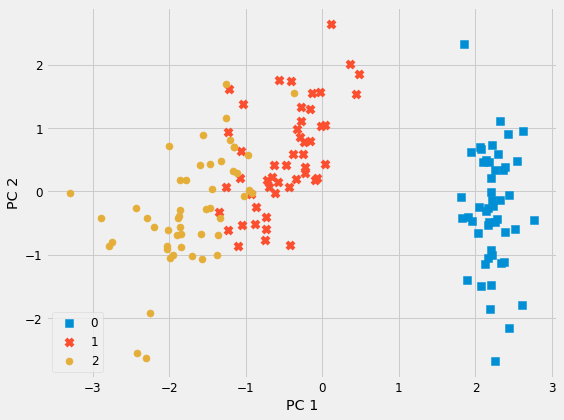

In [ ]:
#Notice that unlike scikit-learn, we use transform on the dataframe at hand for all ML models' class after fitting it (calling .fit on the dataframe). This will return the result in a new column, where the name is specified by the outputCol argument in the ML models' class.
#We can convert it back to a numpy array by extracting the pcaFeatures column from each row, and use collect to bring the entire dataset back to a single machine.

# not sure if this is the best way to do it
X_pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
X_pca = np.array(X_pca)

import matplotlib.pyplot as plt
# change default style figure and font size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12


def plot_iris_pca(X_pca, y):
    """a scatter plot of the 2-dimensional iris data"""
    markers = 's', 'x', 'o'
    colors = list(plt.rcParams['axes.prop_cycle'])
    target = np.unique(y)
    for idx, (t, m) in enumerate(zip(target, markers)):
        subset = X_pca[y == t]
        plt.scatter(subset[:, 0], subset[:, 1], s = 50,
                    c = colors[idx]['color'], label = t, marker = m)

    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc = 'lower left')
    plt.tight_layout()
    plt.show()

plot_iris_pca(X_pca, groundtruth)